# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
#from api_keys import weather_api_key
weather_api_key = "ca9485fa85c146e6ad728bd4a821bcc8"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list # So in other words - this is building a list not comparing
    if city not in cities:
        cities.append(city)

# Checking my list of cities
df = pd.DataFrame(cities,columns=['Cities'])

# Print the city count to confirm sufficient count
len(cities)
#df


634

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
 # q=London&appid=ca9485fa85c146e6ad728bd4a821bcc8
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# query_url = url + "q=London&" + "appid=ca9485fa85c146e6ad728bd4a821bcc8"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
#pprint(query_url)

In [4]:
# loop throught the list of cities and append them to temperatures list

# I guess I didn't actually append cities to the temperature list????

temp = []
lati = []
longi = []
humidity = []
cloudy = []
windspd = []
name = []
ctry = []
counter = 0
for city in cities: 
    try:
        response = requests.get(query_url + city).json()
        time.sleep(1) # Adding a second between calls to prevent reaching limit
    
        temp.append(response['main']['temp']) 
        lati.append(response['coord']['lat'])
        longi.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        cloudy.append(response['clouds']['all']) 
        windspd.append(response['wind']['speed'])
        name.append(response['name'])
        ctry.append(response['sys']['country'])
         
        print(counter, city) # So this is to print the city name and count in the list
        counter = counter + 1
    except:
        continue
        

0 butaritari
1 albany
2 birmitrapur
3 punta arenas
4 aswan
5 atasu
6 ushuaia
7 nova granada
8 tomatlan
9 faanui
10 jamestown
11 srednekolymsk
12 lebu
13 anadyr
14 cape town
15 saint-gaudens
16 salinas
17 mahebourg
18 wajid
19 dingle
20 lewistown
21 hobart
22 quang ngai
23 mataura
24 namtsy
25 ibra
26 rikitea
27 saskylakh
28 verkhnyaya inta
29 qaanaaq
30 volzhskiy
31 fortuna
32 tuktoyaktuk
33 manyana
34 kapaa
35 lasa
36 barrow
37 port alfred
38 mabaruma
39 ladario
40 mar del plata
41 rabak
42 nanortalik
43 vao
44 bluff
45 hithadhoo
46 pevek
47 ponta do sol
48 hermanus
49 naron
50 norman wells
51 tiksi
52 tiznit
53 chumikan
54 bireun
55 tumbi
56 milkovo
57 auki
58 malmesbury
59 souillac
60 karratha
61 beringovskiy
62 george town
63 busselton
64 menzelinsk
65 muroto
66 asuncion nochixtlan
67 port elizabeth
68 naranjos
69 caravelas
70 plettenberg bay
71 cherskiy
72 panji
73 kikwit
74 nyaunglebin
75 kaitangata
76 torbay
77 chany
78 muyezerskiy
79 igrim
80 katsuura
81 castro
82 salym
83 xam 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
cities_df = pd.DataFrame({"City":name,
                          "Country":ctry,
                          "Temperature": temp, 
                          "Humidity":humidity,
                          "Latitude": lati,
                          "Longitude": longi,
                          "Humidity":humidity,
                          "Cloudiness":cloudy,
                          "Wind Speed":windspd})


In [6]:
cities_df

,City,Country,Temperature,Humidity,Latitude,Longitude,Cloudiness,Wind Speed
0,Butaritari,KI,80.89,81,3.0707,172.7902,91,21.90
1,Albany,US,31.39,64,42.6001,-73.9662,75,12.66
2,Birmitrapur,IN,61.47,61,22.4000,84.7667,40,6.38
3,Punta Arenas,CL,57.09,41,-53.1500,-70.9167,20,19.57
4,Aswān,EG,70.03,25,24.0934,32.9070,0,10.00
...,...,...,...,...,...,...,...,...
580,Okhotsk,RU,2.26,90,59.3833,143.3000,100,8.72
581,Kohima,IN,47.88,82,25.6667,94.1167,0,2.01
582,Lompoc,US,48.43,81,34.6391,-120.4579,1,5.75
583,Ubari,LY,72.19,20,26.5921,12.7805,72,13.31


In [7]:
cities_df.to_csv("cities.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

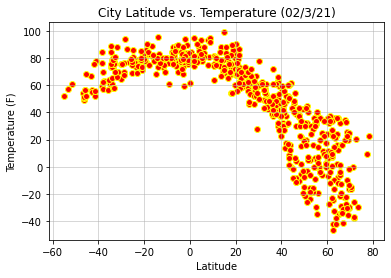

In [10]:
plt.scatter(cities_df["Latitude"], cities_df["Temperature"], facecolor = "red", edgecolor = "yellow")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Temperature (F)")

# Set title
plt.title("City Latitude vs. Temperature (02/3/21)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("City Latitude vs Temperature.png")

# As latitudes from zero increase - temps drop

## Latitude vs. Humidity Plot

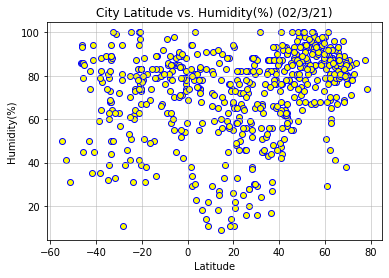

In [11]:
plt.scatter(cities_df["Latitude"], cities_df["Humidity"], facecolor = "yellow", edgecolor = "blue")

# Set title
plt.title("City Latitude vs. Humidity(%) (02/3/21)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Humidity(%)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Humidity(%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("City Latitude vs Humidity.png")

# many cities in higher latitudes with high humidity

## Latitude vs. Cloudiness Plot

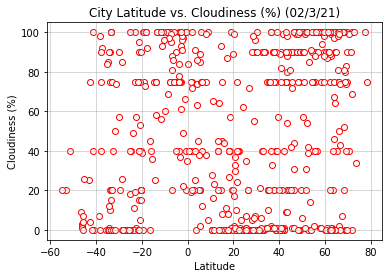

In [12]:
plt.scatter(cities_df["Latitude"], cities_df["Cloudiness"], facecolor = "white", edgecolor = "red")

# Set title
plt.title("City Latitude vs. Cloudiness (%) (02/3/21)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("City Latitude vs Cloudiness.png")

# Cloudiness is along latitudes

## Latitude vs. Wind Speed Plot

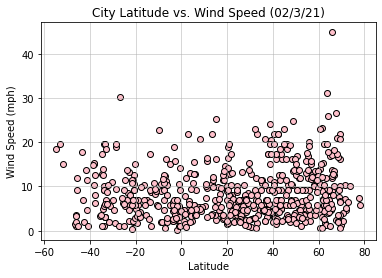

In [13]:
plt.scatter(cities_df["Latitude"], cities_df["Wind Speed"], facecolor = "pink", edgecolor = "black")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Wind Speed (mph)")

# Set title
plt.title("City Latitude vs. Wind Speed (02/3/21)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Wind Speed (mph)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("City Latitude vs wind speed.png")

# Plot shows wind speed spread across latitudes

## Linear Regression

In [14]:
northern = cities_df.loc[cities_df["Latitude"]>=0]
southern = cities_df.loc[cities_df["Latitude"]<0]
northern

,City,Country,Temperature,Humidity,Latitude,Longitude,Cloudiness,Wind Speed
0,Butaritari,KI,80.89,81,3.0707,172.7902,91,21.90
1,Albany,US,31.39,64,42.6001,-73.9662,75,12.66
2,Birmitrapur,IN,61.47,61,22.4000,84.7667,40,6.38
4,Aswān,EG,70.03,25,24.0934,32.9070,0,10.00
5,Atasū,KZ,31.48,98,48.6814,71.6433,100,24.72
...,...,...,...,...,...,...,...,...
580,Okhotsk,RU,2.26,90,59.3833,143.3000,100,8.72
581,Kohima,IN,47.88,82,25.6667,94.1167,0,2.01
582,Lompoc,US,48.43,81,34.6391,-120.4579,1,5.75
583,Ubari,LY,72.19,20,26.5921,12.7805,72,13.31


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

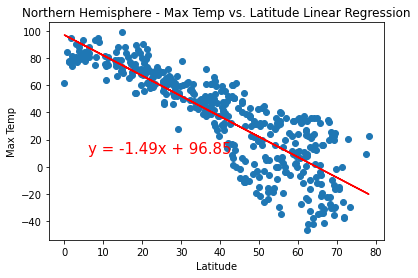

<Figure size 432x288 with 0 Axes>

In [15]:
x2 = northern["Latitude"]
y2 = northern["Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x2, y2)
regress_values = x2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x2,y2)
plt.plot(x2,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.show()
# Save the plotted figure as .pngs
plt.savefig("Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

# Stong negative correlation between max temp and latitude 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

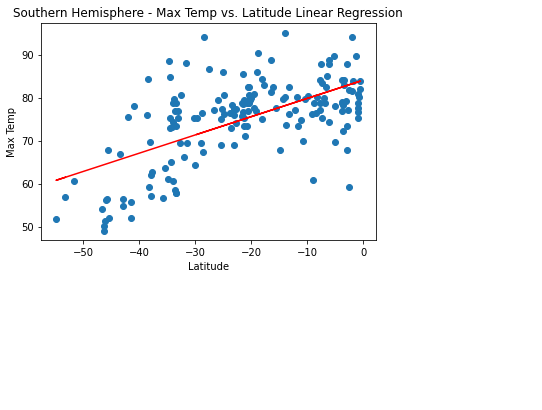

<Figure size 432x288 with 0 Axes>

In [16]:
x2 = southern["Latitude"]
y2 = southern["Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x2, y2)
regress_values = x2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x2,y2)
plt.plot(x2,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.show()
# Save the plotted figure as .pngs
plt.savefig("Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

# Somewhat positive correlation between latitude and max temperature 

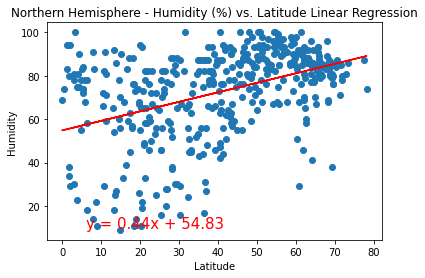

<Figure size 432x288 with 0 Axes>

In [17]:
x2 = northern["Latitude"]
y2 = northern["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x2, y2)
regress_values = x2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x2,y2)
plt.plot(x2,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.show()
# Save the plotted figure as .pngs
plt.savefig("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

# some positive correlation between latitude and humidity

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

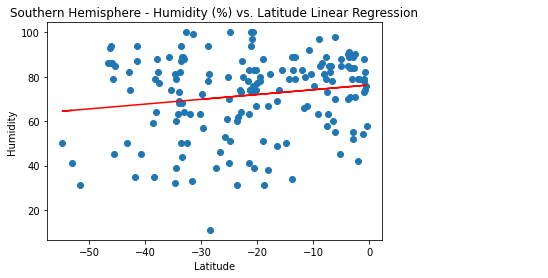

<Figure size 432x288 with 0 Axes>

In [18]:
x2 = southern["Latitude"]
y2 = southern["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x2, y2)
regress_values = x2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x2,y2)
plt.plot(x2,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.show()
# Save the plotted figure as .pngs
plt.savefig("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

# Slight positive correlation between latitude and humidity

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

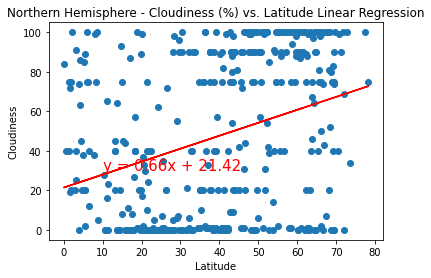

<Figure size 432x288 with 0 Axes>

In [19]:
x2 = northern["Latitude"]
y2 = northern["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x2, y2)
regress_values = x2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x2,y2)
plt.plot(x2,regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.show()
# Save the plotted figure as .pngs
plt.savefig("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

# Weak positive correlation between between latitude and cloudiness

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

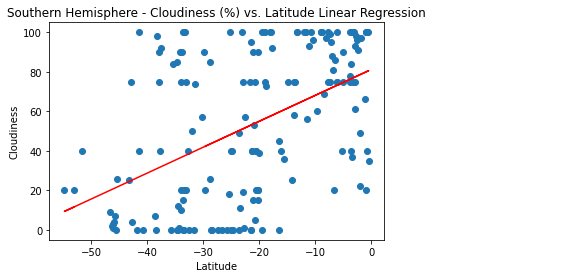

<Figure size 432x288 with 0 Axes>

In [20]:
x2 = southern["Latitude"]
y2 = southern["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x2, y2)
regress_values = x2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x2,y2)
plt.plot(x2,regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.show()
# Save the plotted figure as .pngs
plt.savefig("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

# Weak postitive correlation between cloudiness and latitude

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

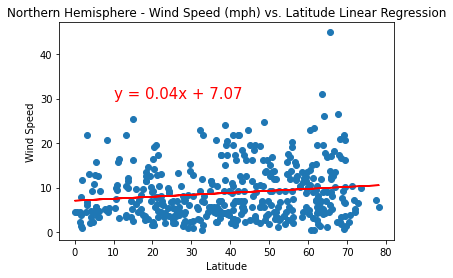

<Figure size 432x288 with 0 Axes>

In [21]:
x2 = northern["Latitude"]
y2 = northern["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x2, y2)
regress_values = x2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x2,y2)
plt.plot(x2,regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.show()
# Save the plotted figure as .pngs
plt.savefig("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

# Weak postive correlation between latitude and windspeed

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

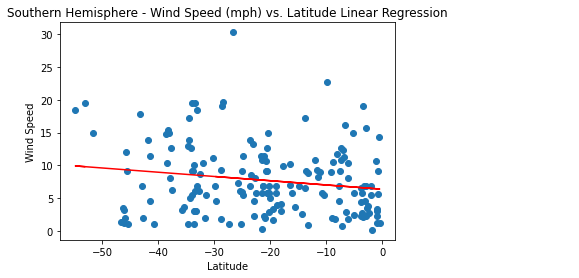

<Figure size 432x288 with 0 Axes>

In [22]:
x2 = southern["Latitude"]
y2 = southern["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x2, y2)
regress_values = x2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x2,y2)
plt.plot(x2,regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.show()
# Save the plotted figure as .pngs
plt.savefig("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

# Weak negative correlation between latitude and wind speed